# RFM ANALYSIS OF SALES DATA FOR AN ONLINE STORE

In [3]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#IMPORTING THE DATASETS
df1 = pd.read_excel("C:\\Users\\lenovo\\Desktop\\2009_2010.xlsx")
df2 = pd.read_excel("C:\\Users\\lenovo\\Desktop\\2010_2011.xlsx")
print(df1.head())
print(df2.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365

In [9]:
# COMBINING MY DATASETS
df = pd.concat([df1,df2], ignore_index = True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [39]:
# DEFINE RFM METRICS
df['OrderDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['Price']
df['TotalAmount']
 

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: TotalAmount, Length: 1067371, dtype: float64

In [21]:
# RECENCY
recency_df = df.groupby('Customer ID')['OrderDate'].max().reset_index() 
recency_df.columns = ['Customer ID' , 'last_order_date']
recency_df['recency'] = (recency_df['last_order_date'].max() - recency_df['last_order_date']).dt.days
recency_df['recency']                               

0       325
1         1
2        74
3        18
4       309
       ... 
5937      3
5938    429
5939    660
5940    476
5941     42
Name: recency, Length: 5942, dtype: int64

In [43]:
# FREQUENCY
frequency_df = df.groupby('Customer ID')['StockCode'].count().reset_index() 
frequency_df.columns = ['Customer ID' , 'frequency']
frequency_df
frequency_sort = frequency_df.sort_values(by='frequency', ascending = False)
frequency_sort.head()

,Customer ID,frequency
5495,17841.0,13097
2565,14911.0,11613
402,12748.0,7307
2260,14606.0,6709
1750,14096.0,5128


In [41]:
# MONETARY
monetary_df =  df.groupby('Customer ID')['TotalAmount'].sum().reset_index()
monetary_df.columns = ['Customer ID' , 'TotalAmount']
monetary_sort = monetary_df.sort_values(by='TotalAmount', ascending = False)
monetary_sort.head()

,Customer ID,TotalAmount
5756,18102.0,598215.22
2300,14646.0,523342.07
1810,14156.0,296564.69
2565,14911.0,270248.53
5104,17450.0,233579.39


In [45]:
# MERGING RFM METRICS
rfm_merge = pd.merge(recency_df,frequency_df,on = 'Customer ID')
rfm_merged = pd.merge(rfm_merge,monetary_df,on = 'Customer ID')
rfm_merged

,Customer ID,last_order_date,recency,frequency,TotalAmount
0,12346.0,2011-01-18 10:17:00,325,48,-64.68
1,12347.0,2011-12-07 15:52:00,1,253,5633.32
2,12348.0,2011-09-25 13:13:00,74,51,2019.40
3,12349.0,2011-11-21 09:51:00,18,180,4404.54
4,12350.0,2011-02-02 16:01:00,309,17,334.40
...,...,...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3,986,2736.65
5938,18284.0,2010-10-06 12:31:00,429,29,436.68
5939,18285.0,2010-02-17 10:24:00,660,12,427.00
5940,18286.0,2010-08-20 11:57:00,476,70,1188.43


In [52]:
#MAKING THE RESULTS SUITABLE FOR CALCULATIONS(NORMALIZATION)
rfm_merged['recency_score'] = pd.qcut(rfm_merged['recency'],5, labels = [5,4,3,2,1])
rfm_merged['frequency_score'] = pd.qcut(rfm_merged['frequency'],5, labels = [1,2,3,4,5])                                  
rfm_merged['monetary_score'] = pd.qcut(rfm_merged['TotalAmount'],5, labels = [1,2,3,4,5])

In [57]:
# CALCULATING RFM SCORE
rfm_merged['rfm_score'] = rfm_merged['recency_score'].astype(str) + rfm_merged['frequency_score'].astype(str) + rfm_merged['monetary_score'].astype(str)
rfm_merged['rfm_score']

0       231
1       555
2       334
3       445
4       222
       ... 
5937    554
5938    122
5939    112
5940    134
5941    445
Name: rfm_score, Length: 5942, dtype: object

In [77]:
#CUSTOMER SEGMENTATION
def segment_customers(score):
    if score >= '500':
        return 'Best Customers'
    elif score >= '400':
        return 'Loyal Customers'
    elif score >= '220':
        return 'Potential Upgrades'
    else:
        return'Once in a while'
rfm_merged['segments'] = rfm_merged['rfm_score'].apply(segment_customers)
rfm_merged['segments']

0       Potential Upgrades
1           Best Customers
2       Potential Upgrades
3          Loyal Customers
4       Potential Upgrades
               ...        
5937        Best Customers
5938       Once in a while
5939       Once in a while
5940       Once in a while
5941       Loyal Customers
Name: segments, Length: 5942, dtype: object

In [78]:
#CUSTOMER DISTRIBUTION
customer_distribution = rfm_merged['segments'].value_counts(normalize=True) * 100
customer_distribution

Potential Upgrades    34.988219
Once in a while       24.907439
Best Customers        20.060586
Loyal Customers       20.043756
Name: segments, dtype: float64

In [83]:
#PRINTING OUR RESULTS
print('Customer Segmentation : ')
print(rfm_merged.head())
print('\ncustomer_distribution')
print(customer_distribution)

Customer Segmentation : 
   Customer ID     last_order_date  recency  frequency  TotalAmount  \
0      12346.0 2011-01-18 10:17:00      325         48       -64.68   
1      12347.0 2011-12-07 15:52:00        1        253      5633.32   
2      12348.0 2011-09-25 13:13:00       74         51      2019.40   
3      12349.0 2011-11-21 09:51:00       18        180      4404.54   
4      12350.0 2011-02-02 16:01:00      309         17       334.40   

  recency_score frequency_score monetary_score rfm_score            segments  
0             2               3              1       231  Potential Upgrades  
1             5               5              5       555      Best Customers  
2             3               3              4       334  Potential Upgrades  
3             4               4              5       445     Loyal Customers  
4             2               2              2       222  Potential Upgrades  

customer_distribution
Potential Upgrades    34.988219
Once in a while    

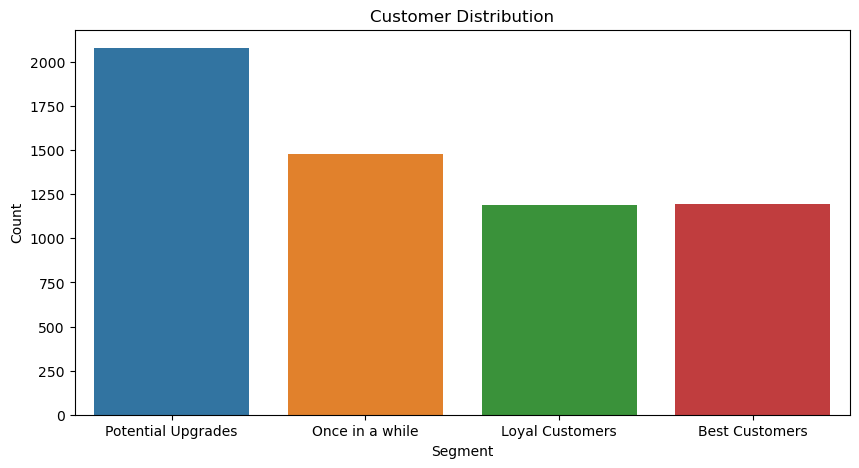

In [91]:
#VISUALIZING OUR RESULTS
rfm_merged = rfm_merged.sort_values(by='segments', ascending = False)
plt.figure(figsize=(10,5))
sns.countplot(x='segments', data=rfm_merged)
plt.title('Customer Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

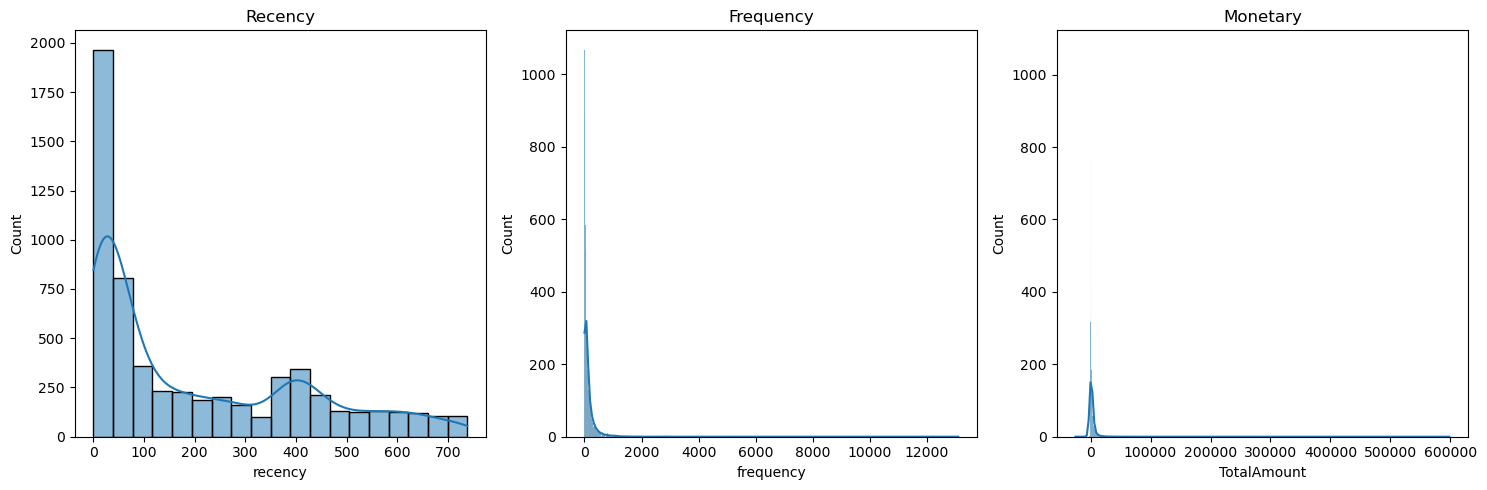

In [100]:
#VISUALIZING RFM METRICS
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.histplot(rfm_merged['recency'], ax = axs[0],  kde = True)
axs[0].set_title('Recency')
sns.histplot(rfm_merged['frequency'], ax = axs[1], kde = True)
axs[1].set_title('Frequency')
sns.histplot(rfm_merged['TotalAmount'], ax = axs[2],  kde = True)
axs[2].set_title('Monetary')
plt.tight_layout()
plt.show()

In [106]:
# SAVE RESULTS TO EXCEL
rfm_merged.to_excel('rfm_analysis.xlsx', index=True)

In [ ]:
metric = ['recency','frequency','TotalAmount']
fig,axs = plt.subplots(1,len(metric),figsize=(15,5))
for i,metrics in enumerate(metric):
    sns.histplot(rfm_merged[metric], ax = axs[i], kde = True)
    axs[i].set_xlim([0,rfm_merged[metric].max() * 1.1])
    
plt.tight_layout()
plt.show()